In [160]:

import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm

from glob import glob

warnings.filterwarnings("ignore")

from matplotlib.ticker import FormatStrFormatter
#gfc = gfc.rename(columns = {'AUS':"AUS", 'CHI':'CHN', 'FRA':'FRA', 'GER':'DEU', 'USA':'USA'})

sns.set(style='white',  font='sans-serif', font_scale=2)  

from statannot import add_stat_annotation


In [161]:
RF_result_files = glob('./RF/**/performance_results.csv')
df1 = pd.DataFrame(RF_result_files, columns=['RF'])
df1['dataset'] = df1.RF.apply(lambda x:os.path.basename(os.path.dirname(x)).split('_')[-1])


AggMapNet_result_files = glob('./AggMapNet/**/performance_results.csv')

df2 = pd.DataFrame(AggMapNet_result_files, columns=['AggMapNet'])
df2['dataset'] = df2.AggMapNet.apply(lambda x:os.path.basename(os.path.dirname(x)).split('_')[0])

df = df1.set_index('dataset').join(df2.set_index('dataset'))

In [162]:
df

,RF,AggMapNet
dataset,,
IBD,./RF/RF_results_IBD/performance_results.csv,./AggMapNet/IBD_results/performance_results.csv
Cirrhosis,./RF/RF_results_Cirrhosis/performance_results.csv,./AggMapNet/Cirrhosis_results/performance_resu...
CRC,./RF/RF_results_CRC/performance_results.csv,./AggMapNet/CRC_results/performance_results.csv
Obesity,./RF/RF_results_Obesity/performance_results.csv,./AggMapNet/Obesity_results/performance_result...
T2D,./RF/RF_results_T2D/performance_results.csv,./AggMapNet/T2D_results/performance_results.csv


In [163]:
alls = []
for i in range(len(df)):
    ts = df.iloc[i]
    x1 = pd.read_csv(ts.RF, index_col=0)[['auc', 'mcc', 'f1']].unstack().reset_index()[['level_0', 0]]
    x1.columns = ['metric', 'value']
    x1['model'] = 'RF'
    x1['dataset'] = ts.name

    x2 = pd.read_csv(ts.AggMapNet, index_col=0)[['auc', 'mcc', 'f1']].unstack().reset_index()[['level_0', 0]]
    x2.columns = ['metric', 'value']
    x2['model'] = 'AggMapNet'
    x2['dataset'] = ts.name

    dfp = x2.append(x1)
    alls.append(dfp)

In [164]:
dfpa = pd.concat(alls)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IBD_AggMapNet v.s. IBD_RF: t-test paired samples with Bonferroni correction, P_val=1.465e-10 stat=7.489e+00
Cirrhosis_AggMapNet v.s. Cirrhosis_RF: t-test paired samples with Bonferroni correction, P_val=4.700e-01 stat=1.691e+00
T2D_AggMapNet v.s. T2D_RF: t-test paired samples with Bonferroni correction, P_val=1.311e-03 stat=3.787e+00
Obesity_AggMapNet v.s. Obesity_RF: t-test paired samples with Bonferroni correction, P_val=2.687e-11 stat=7.836e+00
CRC_AggMapNet v.s. CRC_RF: t-test paired samples with Bonferroni correction, P_val=2.308e-01 stat=2.019e+00


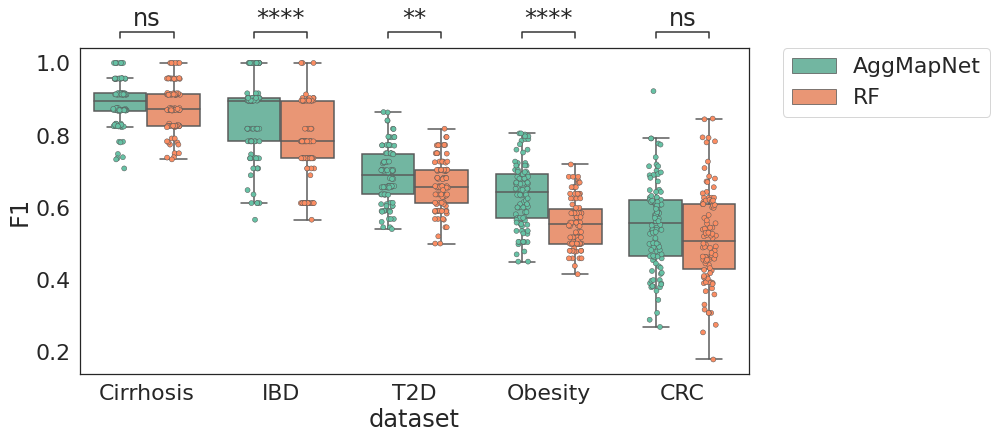

In [165]:
metric = 'f1'

dfp = dfpa[dfpa.metric==metric]

x = "dataset"
y = "value"
order = ['Cirrhosis', 'IBD', 'T2D',  'Obesity', 'CRC']
hue = 'model'
hue_order = [ 'AggMapNet', 'RF']

figsize = (12, 6)

my_box_pairs= [(('Cirrhosis', 'AggMapNet'), ('Cirrhosis', 'RF')), 
            (('IBD', 'AggMapNet'), ('IBD', 'RF')), 
            (('T2D', 'AggMapNet'), ('T2D', 'RF')), 
            (('Obesity', 'AggMapNet'), ('Obesity', 'RF')), 
            (('CRC', 'AggMapNet'), ('CRC', 'RF'))]

fig, ax = plt.subplots(figsize = figsize)


sns.boxplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2", fliersize=0, )
sns.stripplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, jitter=True, size=5, palette="Set2", split=True,linewidth=0.5,edgecolor='gray')



#sns.barplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel(metric.upper())


add_stat_annotation(ax, data = dfp, x=x, y=y, hue = hue, order=order,
                    hue_order=hue_order, plot='boxplot',
                    box_pairs=my_box_pairs,
                    test='t-test_paired', 
                    text_format='star', 
                    loc='outside', verbose=2)


fig.savefig("./results/%s.pdf" % metric,  bbox_inches='tight')

In [166]:
dfp

,metric,value,model,dataset
200,f1,0.896,AggMapNet,IBD
201,f1,1.000,AggMapNet,IBD
202,f1,0.896,AggMapNet,IBD
203,f1,1.000,AggMapNet,IBD
204,f1,0.896,AggMapNet,IBD
...,...,...,...,...
295,f1,0.613,RF,T2D
296,f1,0.636,RF,T2D
297,f1,0.773,RF,T2D
298,f1,0.704,RF,T2D


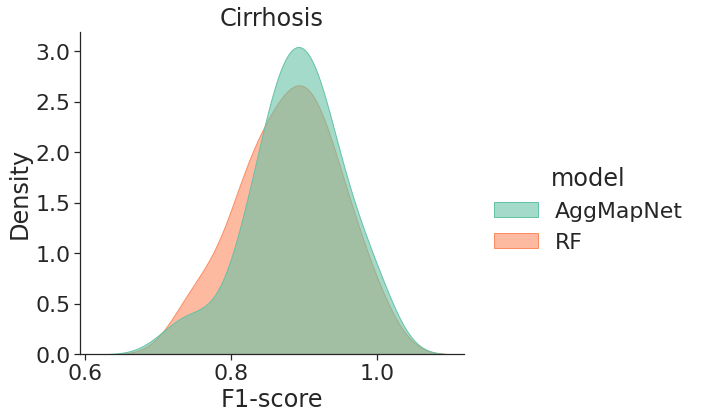

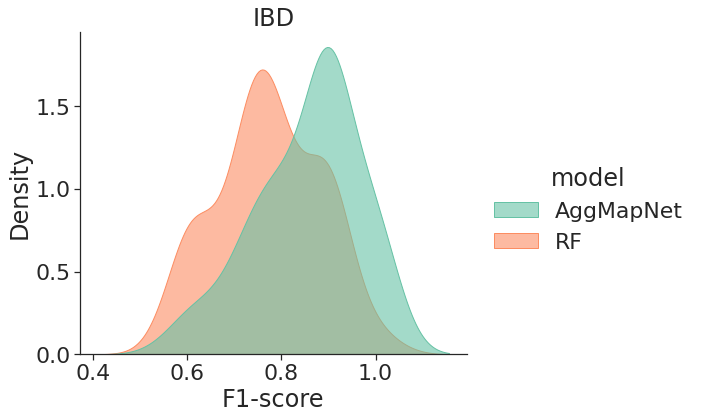

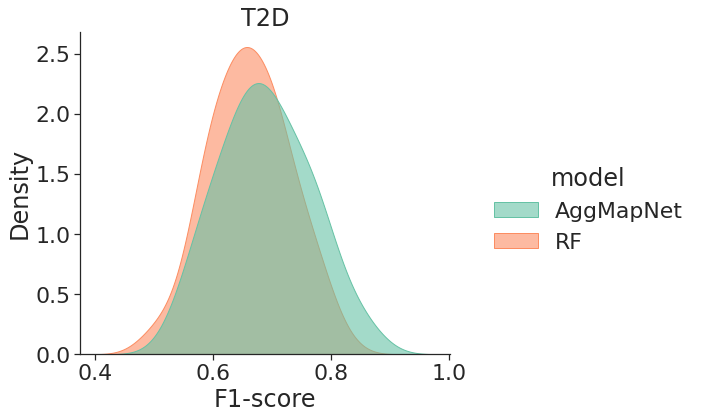

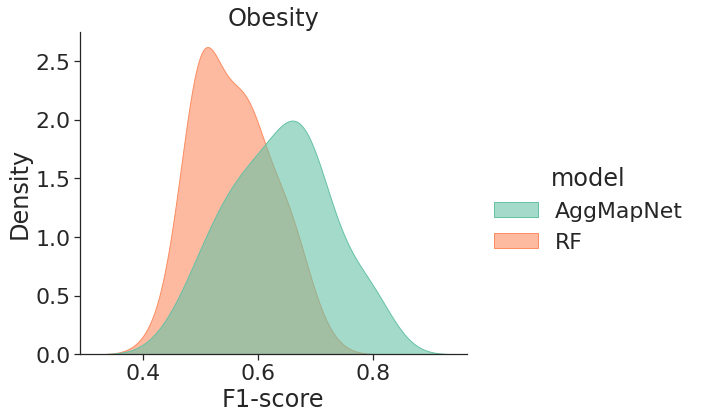

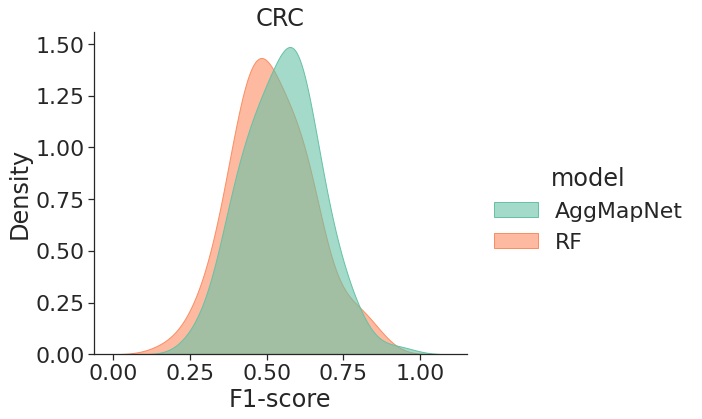

In [167]:
for dataset in order:
    dfp1 = dfp[dfp.dataset == dataset]

    fig = sns.displot(dfp1, x="value", hue="model", kind="kde", fill=True, alpha = 0.6, aspect=1.2, height=6, bw_adjust=1.2,
                palette  = 'Set2')

    fig.ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
    # #fig.savefig('./avg_refined_distribution.pdf')

    fig.ax.set_xlabel('F1-score')

    fig.ax.set_title(dataset)
    
    fig.savefig("./results/%s_%s.pdf" % (metric, dataset),  bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IBD_AggMapNet v.s. IBD_RF: t-test paired samples with Bonferroni correction, P_val=5.324e-10 stat=7.223e+00
Cirrhosis_AggMapNet v.s. Cirrhosis_RF: t-test paired samples with Bonferroni correction, P_val=5.485e-01 stat=1.614e+00
T2D_AggMapNet v.s. T2D_RF: t-test paired samples with Bonferroni correction, P_val=1.119e-03 stat=3.831e+00
Obesity_AggMapNet v.s. Obesity_RF: t-test paired samples with Bonferroni correction, P_val=8.365e-06 stat=5.095e+00
CRC_AggMapNet v.s. CRC_RF: t-test paired samples with Bonferroni correction, P_val=7.289e-01 stat=1.466e+00


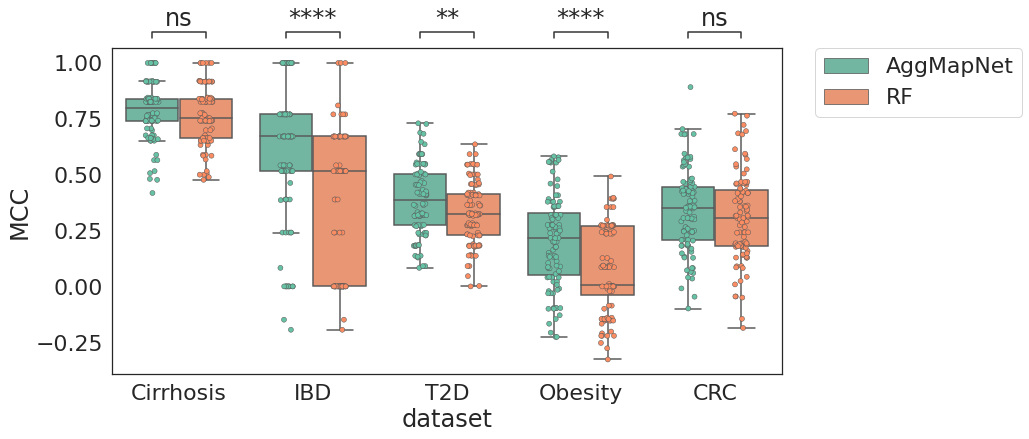

In [168]:
metric = 'mcc'

dfp = dfpa[dfpa.metric==metric]

x = "dataset"
y = "value"
order = ['Cirrhosis', 'IBD', 'T2D',  'Obesity', 'CRC']
hue = 'model'
hue_order = [ 'AggMapNet', 'RF']


my_box_pairs= [(('Cirrhosis', 'AggMapNet'), ('Cirrhosis', 'RF')), 
            (('IBD', 'AggMapNet'), ('IBD', 'RF')), 
            (('T2D', 'AggMapNet'), ('T2D', 'RF')), 
            (('Obesity', 'AggMapNet'), ('Obesity', 'RF')), 
            (('CRC', 'AggMapNet'), ('CRC', 'RF'))]

fig, ax = plt.subplots(figsize = figsize)




sns.boxplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2", fliersize=0, )
sns.stripplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, jitter=True, size=5, palette="Set2", split=True,linewidth=0.5,edgecolor='gray')



#sns.barplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel(metric.upper())


add_stat_annotation(ax, data = dfp, x=x, y=y, hue = hue, order=order,
                    hue_order=hue_order, plot='boxplot',
                    box_pairs=my_box_pairs,
                    test='t-test_paired', 
                    text_format='star', 
                    loc='outside', verbose=2)

fig.savefig("./results/%s.pdf" % metric,  bbox_inches='tight')

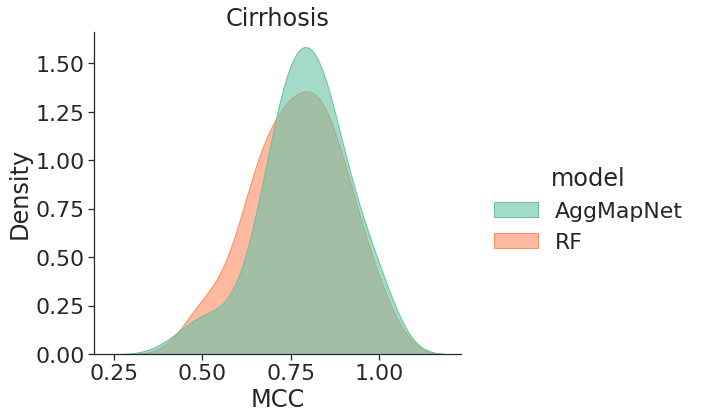

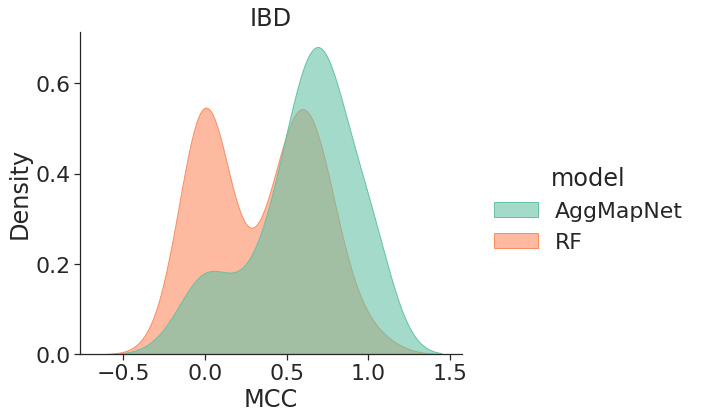

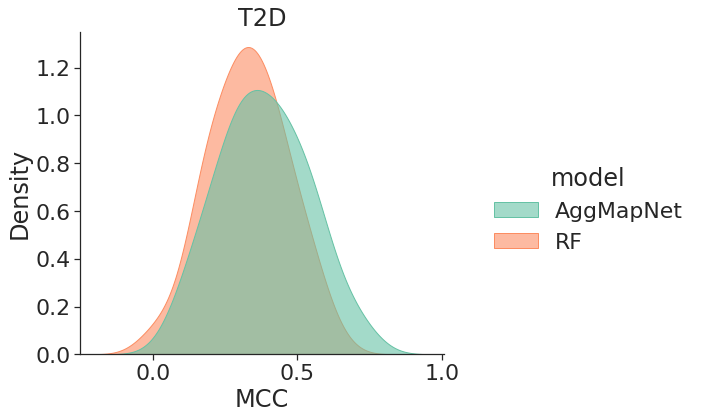

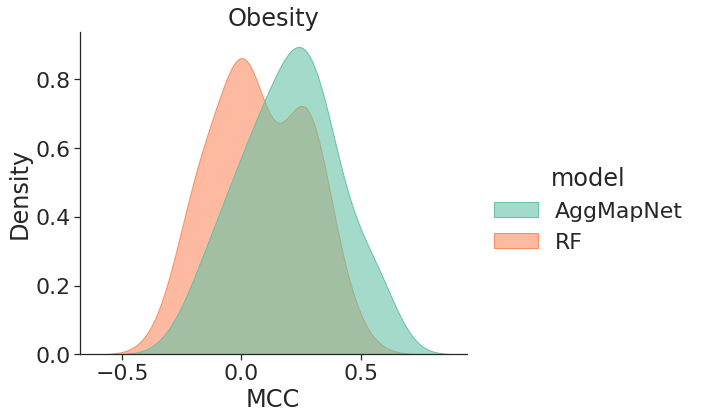

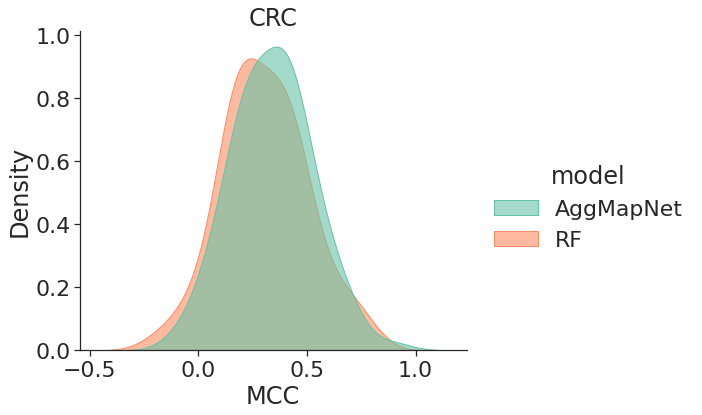

In [169]:
for dataset in order:
    dfp1 = dfp[dfp.dataset == dataset]

    fig = sns.displot(dfp1, x="value", hue="model", kind="kde", fill=True, alpha = 0.6, aspect=1.2, height=6, bw_adjust=1.2,
                palette  = 'Set2')

    fig.ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
    # #fig.savefig('./avg_refined_distribution.pdf')

    fig.ax.set_xlabel('MCC')

    fig.ax.set_title(dataset)
    
    fig.savefig("./results/%s_%s.pdf" % (metric, dataset),  bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

IBD_AggMapNet v.s. IBD_RF: t-test paired samples with Bonferroni correction, P_val=1.601e-04 stat=4.300e+00
Cirrhosis_AggMapNet v.s. Cirrhosis_RF: t-test paired samples with Bonferroni correction, P_val=2.912e-04 stat=4.141e+00
T2D_AggMapNet v.s. T2D_RF: t-test paired samples with Bonferroni correction, P_val=2.850e-01 stat=1.823e+00
Obesity_AggMapNet v.s. Obesity_RF: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=-3.991e-02


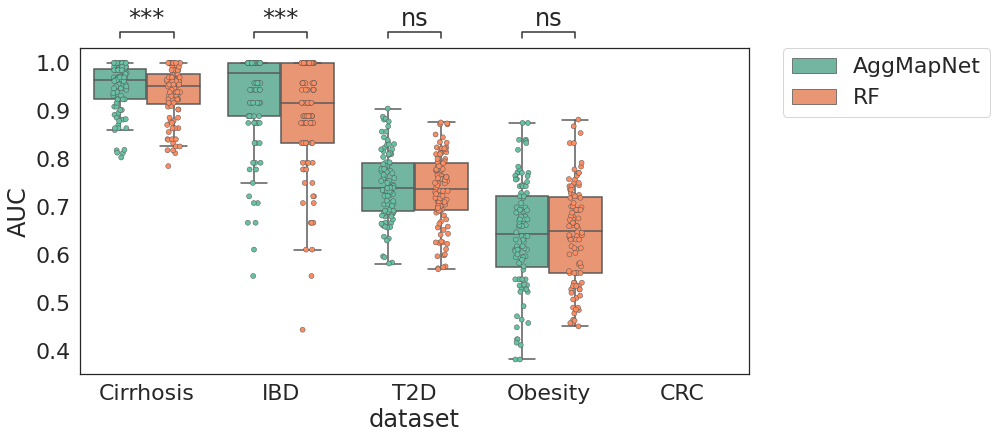

In [170]:
metric = 'auc'

dfp = dfpa[dfpa.metric==metric]

x = "dataset"
y = "value"
order = ['Cirrhosis', 'IBD', 'T2D',  'Obesity', 'CRC']
hue = 'model'
hue_order = [ 'AggMapNet', 'RF']


my_box_pairs= [(('Cirrhosis', 'AggMapNet'), ('Cirrhosis', 'RF')), 
            (('IBD', 'AggMapNet'), ('IBD', 'RF')), 
            (('T2D', 'AggMapNet'), ('T2D', 'RF')), 
            (('Obesity', 'AggMapNet'), ('Obesity', 'RF')),]

fig, ax = plt.subplots(figsize = figsize)


sns.boxplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2", fliersize=0, )
sns.stripplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, jitter=True, size=5, palette="Set2", split=True,linewidth=0.5,edgecolor='gray')



#sns.barplot(data=dfp, x=x, y=y, order=order, hue = hue, hue_order=hue_order, ax = ax, palette="Set2")
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylabel(metric.upper())


add_stat_annotation(ax, data = dfp, x=x, y=y, hue = hue, order=order,
                    hue_order=hue_order, plot='boxplot',
                    box_pairs=my_box_pairs,
                    test='t-test_paired', 
                    text_format='star', 
                    loc='outside', verbose=2)

fig.savefig("./results/%s.pdf" % metric,  bbox_inches='tight')

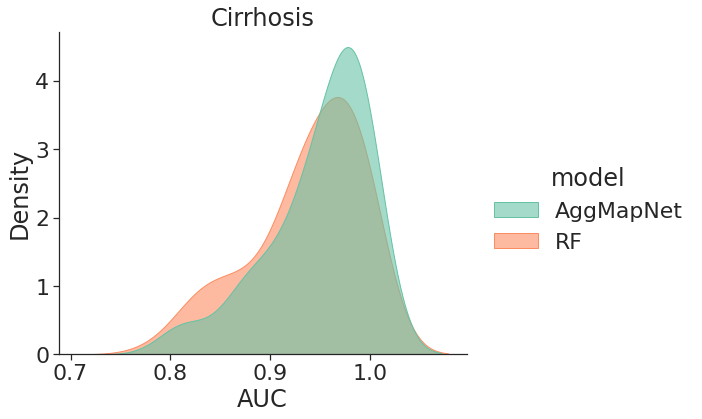

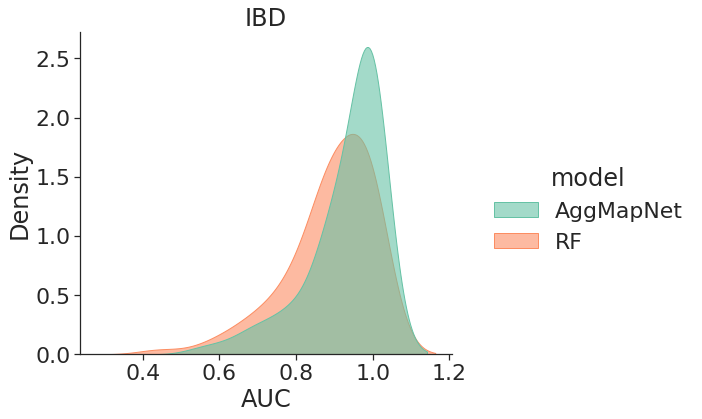

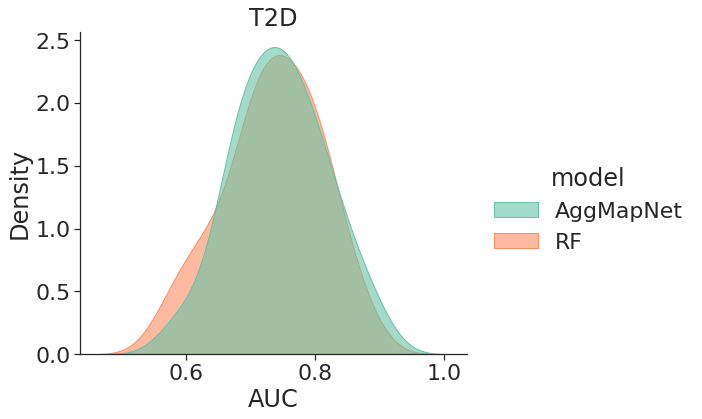

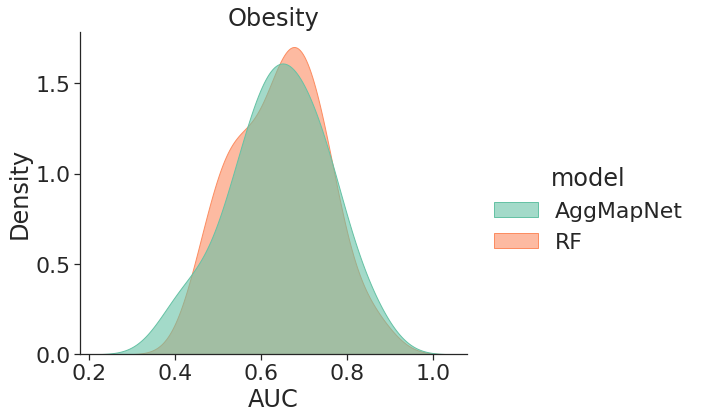

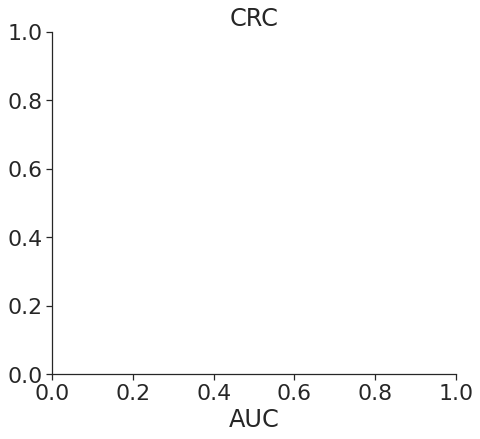

In [171]:
for dataset in order:
    dfp1 = dfp[dfp.dataset == dataset]

    fig = sns.displot(dfp1, x="value", hue="model", kind="kde", fill=True, alpha = 0.6, aspect=1.2, height=6, bw_adjust=1.2,
                palette  = 'Set2')

    fig.ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
    # #fig.savefig('./avg_refined_distribution.pdf')

    fig.ax.set_xlabel('AUC')

    fig.ax.set_title(dataset)
    
    fig.savefig("./results/%s_%s.pdf" % (metric, dataset),  bbox_inches='tight')